In [7]:
import pandas as pd

df = pd.read_csv('./cat.csv')
df

,Breed,Age (Years),Weight (kg),Color,Gender
0,Chartreux,3,3,Brown,Female
1,Persian,13,6,Sable,Female
2,Ragdoll,10,8,Tabby,Male
3,Ragdoll,6,5,Calico,Female
4,Chartreux,16,4,White,Male
...,...,...,...,...,...
116,Persian,16,3,Tabby,Male
117,Ragdoll,2,4,Tricolor,Female
118,Ragdoll,1,4,Tortoiseshell,Male
119,Persian,4,9,Calico,Female


In [8]:
df['Breed'].unique()

array(['Chartreux', 'Persian', 'Ragdoll'], dtype=object)

In [6]:
#solo dejamos 3 tipos de razas y las demas las eliminamos:

razas_deseadas = ['Ragdoll', 'Persian', 'Chartreux']
df_filtrado = df[df['Breed'].isin(razas_deseadas)] 

print(df_filtrado)

df_filtrado.to_csv('cat.csv', index=False)  # guardamos

         Breed  Age (Years)  Weight (kg)          Color  Gender
2    Chartreux            3            3          Brown  Female
3      Persian           13            6          Sable  Female
4      Ragdoll           10            8          Tabby    Male
6      Ragdoll            6            5         Calico  Female
10   Chartreux           16            4          White    Male
..         ...          ...          ...            ...     ...
960    Persian           16            3          Tabby    Male
962    Ragdoll            2            4       Tricolor  Female
965    Ragdoll            1            4  Tortoiseshell    Male
976    Persian            4            9         Calico  Female
999  Chartreux           11            4          Sable  Female

[121 rows x 5 columns]


In [9]:
df.dropna()

,Breed,Age (Years),Weight (kg),Color,Gender
0,Chartreux,3,3,Brown,Female
1,Persian,13,6,Sable,Female
2,Ragdoll,10,8,Tabby,Male
3,Ragdoll,6,5,Calico,Female
4,Chartreux,16,4,White,Male
...,...,...,...,...,...
116,Persian,16,3,Tabby,Male
117,Ragdoll,2,4,Tricolor,Female
118,Ragdoll,1,4,Tortoiseshell,Male
119,Persian,4,9,Calico,Female


In [10]:
e = df.query('Breed == "Persian"')
print('Persian')
e.describe()

Persian


,Age (Years),Weight (kg)
count,37.000000,37.000000
mean,10.837838,5.324324
std,6.016244,2.199167
min,1.000000,2.000000
25%,6.000000,4.000000
50%,12.000000,5.000000
75%,16.000000,7.000000
max,19.000000,9.000000


In [11]:

for i in df['Breed'].unique():
    e = df.query('Breed == "{}"'.format(i))
    print(i)
    print(e.describe())

Chartreux
       Age (Years)  Weight (kg)
count    33.000000    33.000000
mean      9.969697     5.000000
std       5.881565     2.358495
min       1.000000     2.000000
25%       4.000000     3.000000
50%      10.000000     5.000000
75%      15.000000     7.000000
max      19.000000     9.000000
Persian
       Age (Years)  Weight (kg)
count    37.000000    37.000000
mean     10.837838     5.324324
std       6.016244     2.199167
min       1.000000     2.000000
25%       6.000000     4.000000
50%      12.000000     5.000000
75%      16.000000     7.000000
max      19.000000     9.000000
Ragdoll
       Age (Years)  Weight (kg)
count    51.000000    51.000000
mean      9.294118     5.607843
std       5.893366     2.088812
min       1.000000     2.000000
25%       4.000000     4.000000
50%       8.000000     5.000000
75%      15.500000     7.000000
max      19.000000     9.000000


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df

,Breed,Age (Years),Weight (kg),Color,Gender
0,Chartreux,3,3,Brown,Female
1,Persian,13,6,Sable,Female
2,Ragdoll,10,8,Tabby,Male
3,Ragdoll,6,5,Calico,Female
4,Chartreux,16,4,White,Male
...,...,...,...,...,...
116,Persian,16,3,Tabby,Male
117,Ragdoll,2,4,Tricolor,Female
118,Ragdoll,1,4,Tortoiseshell,Male
119,Persian,4,9,Calico,Female


In [14]:
X = df.drop('Breed', axis = 1)
y = df['Breed']

In [15]:
X

,Age (Years),Weight (kg),Color,Gender
0,3,3,Brown,Female
1,13,6,Sable,Female
2,10,8,Tabby,Male
3,6,5,Calico,Female
4,16,4,White,Male
...,...,...,...,...
116,16,3,Tabby,Male
117,2,4,Tricolor,Female
118,1,4,Tortoiseshell,Male
119,4,9,Calico,Female


In [16]:
y

0      Chartreux
1        Persian
2        Ragdoll
3        Ragdoll
4      Chartreux
         ...    
116      Persian
117      Ragdoll
118      Ragdoll
119      Persian
120    Chartreux
Name: Breed, Length: 121, dtype: object

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
print(X_train.isnull().sum())  # Revisa si hay valores faltantes en las características
print(y_train.isnull().sum())   # Revisa si hay valores faltantes en las etiquetas



Age (Years)    0
Weight (kg)    0
Color          0
Gender         0
dtype: int64
0


In [22]:
print(X_train.dtypes)  # Asegúrate de que todos sean tipos numéricos
print(y_train.dtypes)  # Asegúrate de que esto también sea numérico



Age (Years)     int64
Weight (kg)     int64
Color          object
Gender         object
dtype: object
object


In [23]:
from sklearn.preprocessing import LabelEncoder

# Inicializa el codificador
label_encoder_color = LabelEncoder()
label_encoder_gender = LabelEncoder()

# Aplica el codificador
X_train['Color'] = label_encoder_color.fit_transform(X_train['Color'])
X_train['Gender'] = label_encoder_gender.fit_transform(X_train['Gender'])


In [24]:
modelos = DecisionTreeClassifier()
modelos.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
import joblib
joblib.dump(modelos, 'model.joblib')

['model.joblib']

In [29]:
X_test['Color'] = label_encoder_color.transform(X_test['Color'])
X_test['Gender'] = label_encoder_gender.transform(X_test['Gender'])



In [30]:
predicciones = modelos.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

   Chartreux       0.33      0.17      0.22        12
     Persian       0.14      0.18      0.16        11
     Ragdoll       0.29      0.36      0.32        14

    accuracy                           0.24        37
   macro avg       0.26      0.24      0.23        37
weighted avg       0.26      0.24      0.24        37



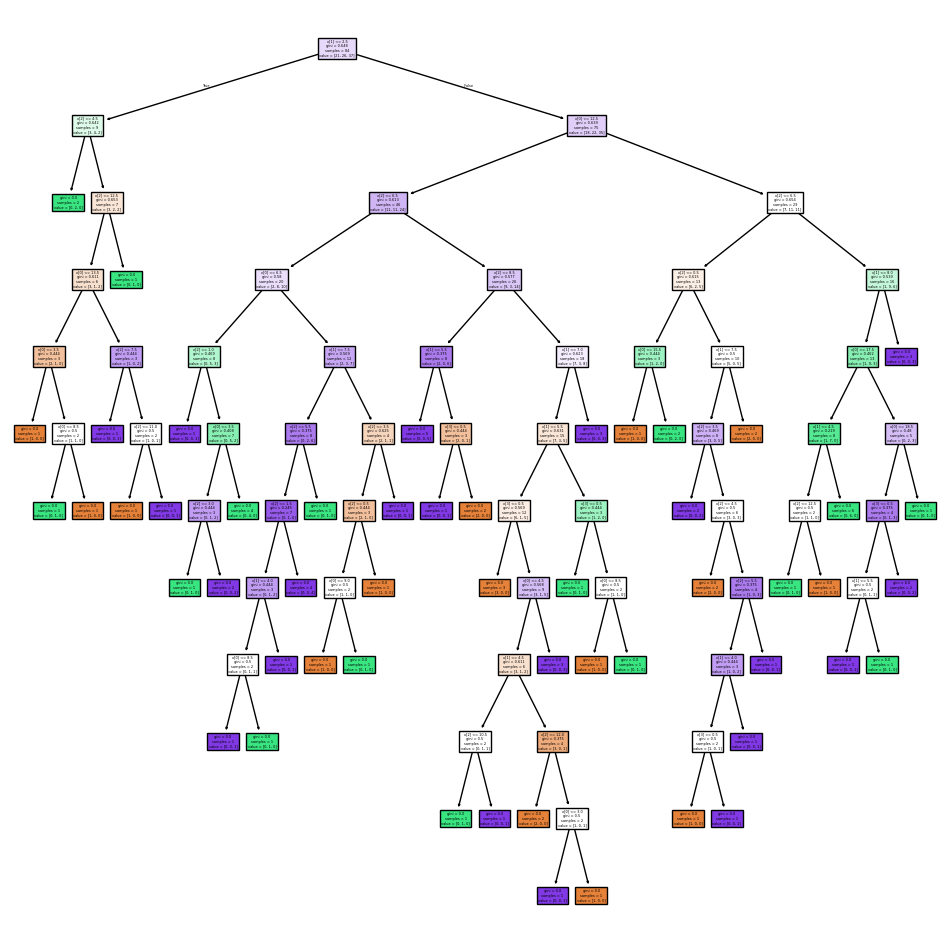

In [33]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=(12,12))
tree.plot_tree(modelos, filled=True)
plt.show()